In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing few required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading and checking the first five rows of the data set
df = pd.read_csv("C:/Users/umprasad/Desktop/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Total number of rows and columns in data
df.shape

(284807, 31)

In [5]:
# Data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# Total number of missing values, column wise
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Checking the total counts of non-default and default cases
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

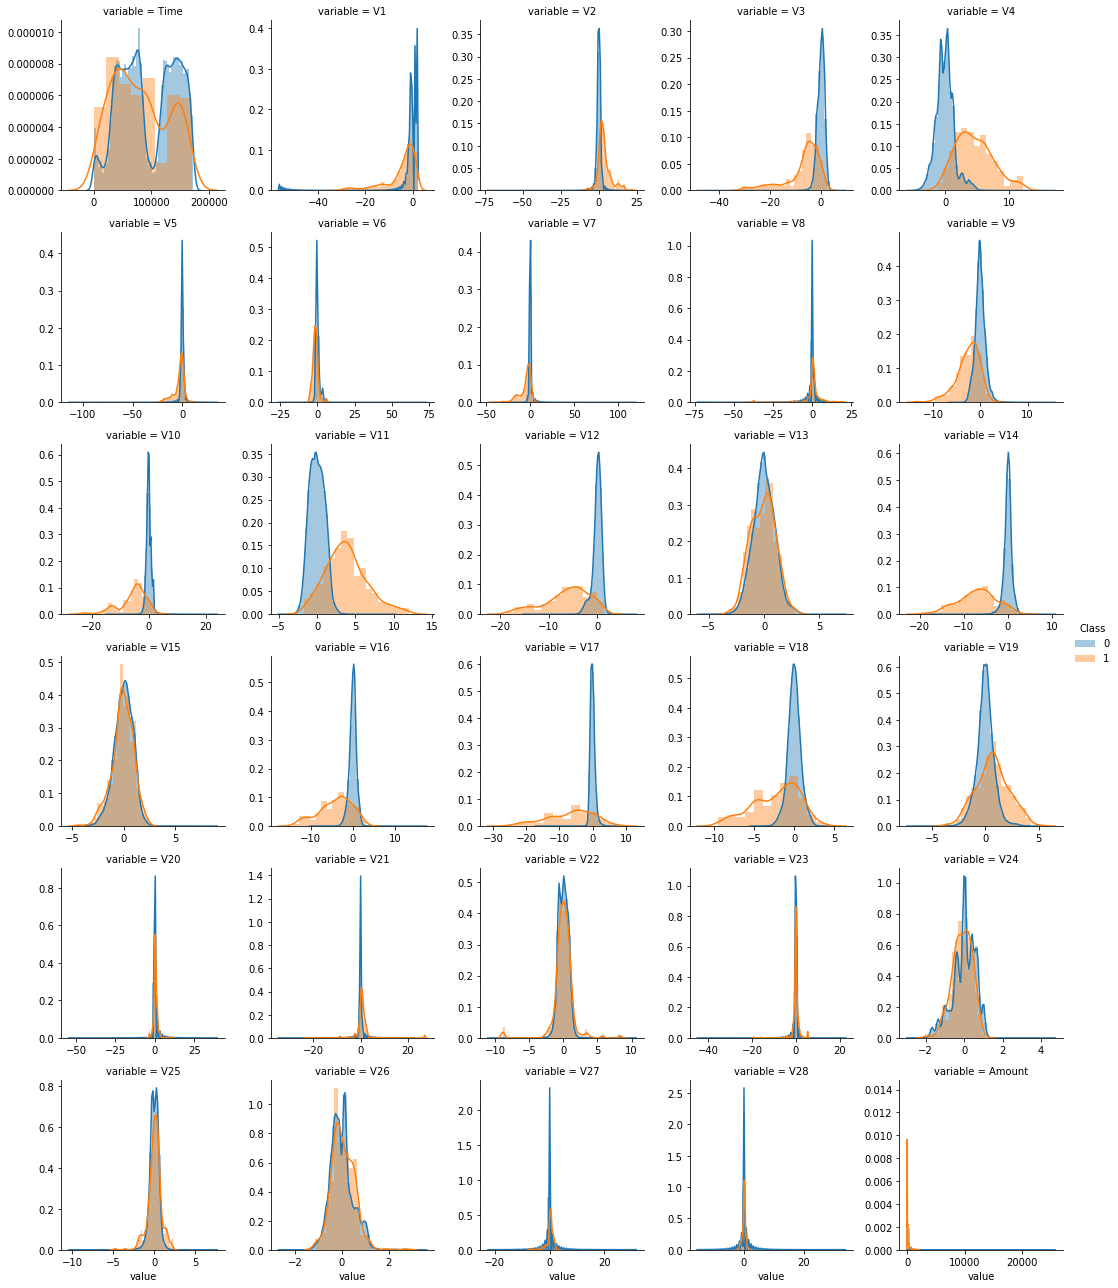

In [8]:
output = 'Class'
cols = [ i for i in df.columns if df.dtypes[i] != "object"]
cols.remove( output )
f = pd.melt( df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [9]:
#sns.pairplot(df)
#plt.show()

In [10]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

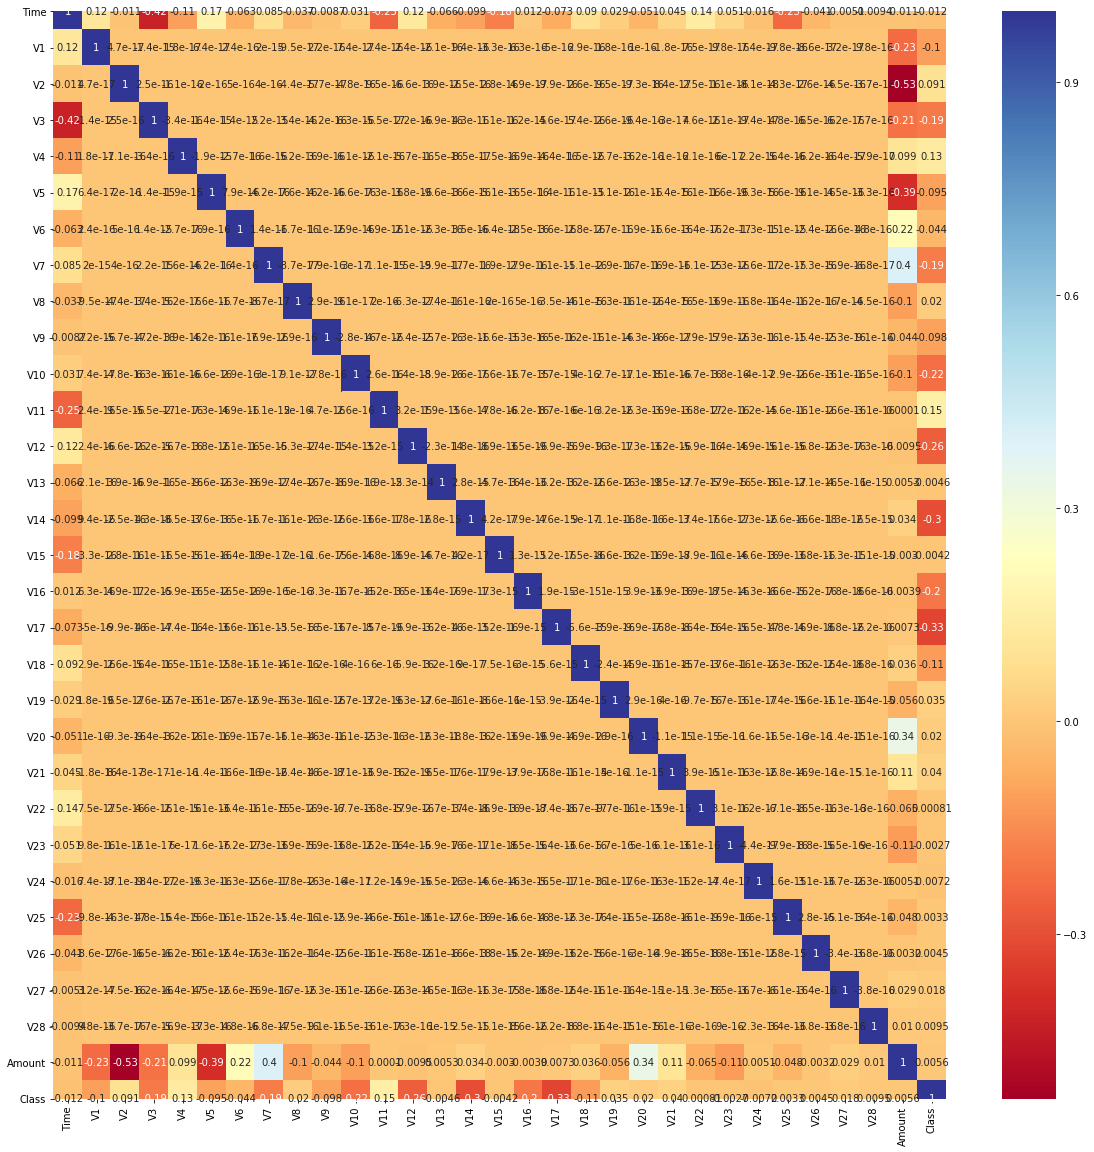

In [11]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")

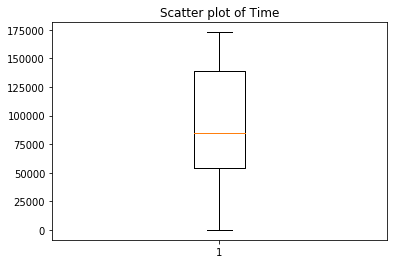

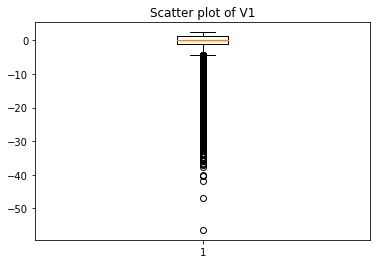

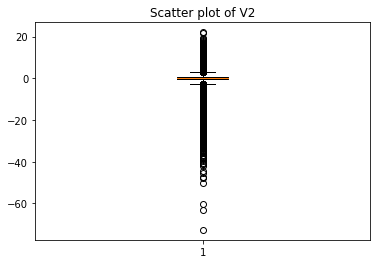

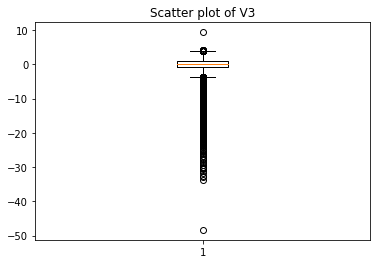

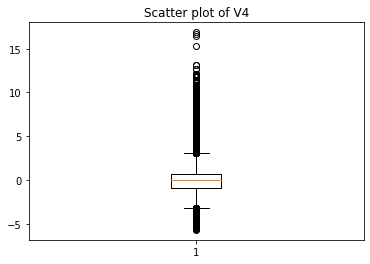

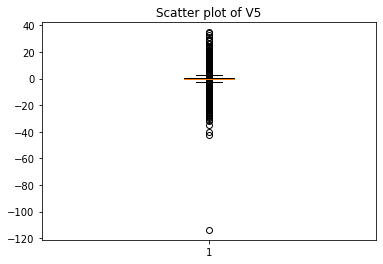

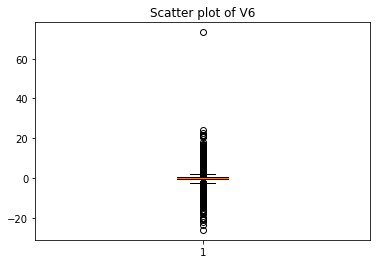

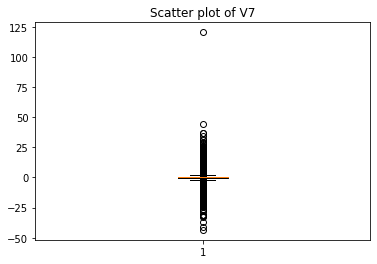

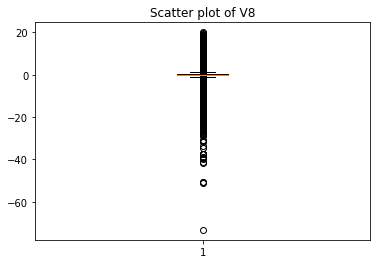

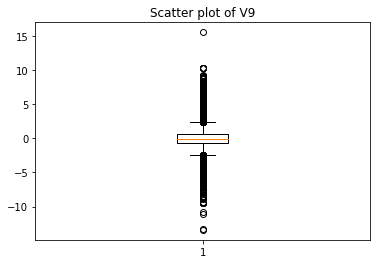

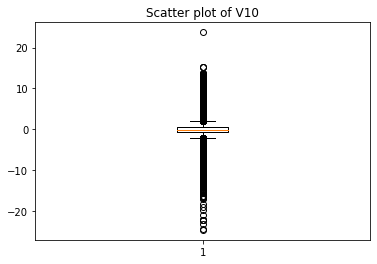

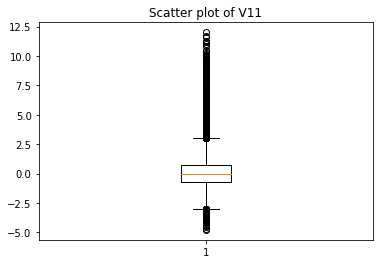

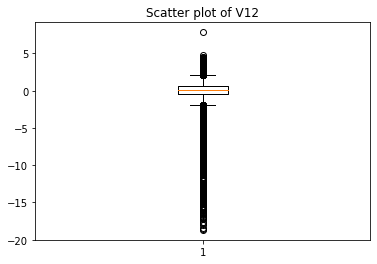

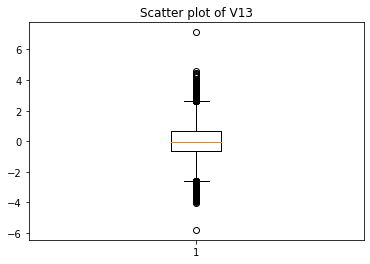

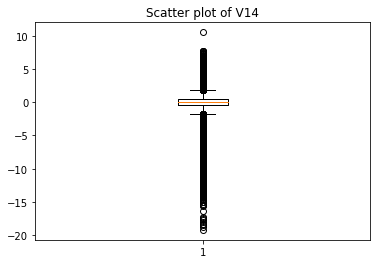

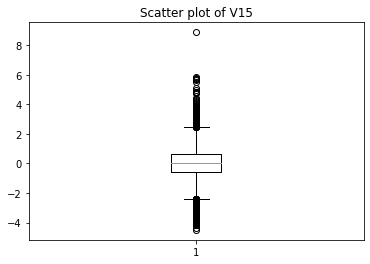

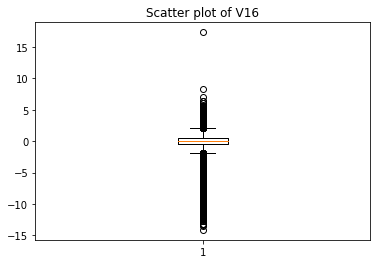

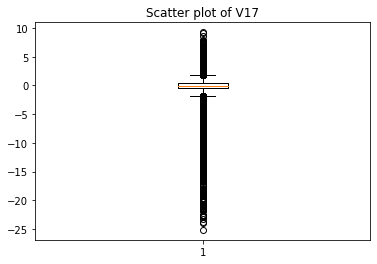

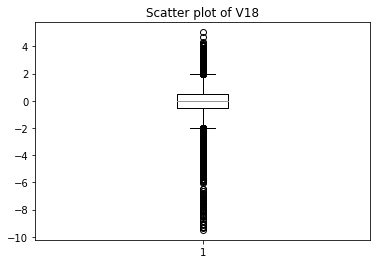

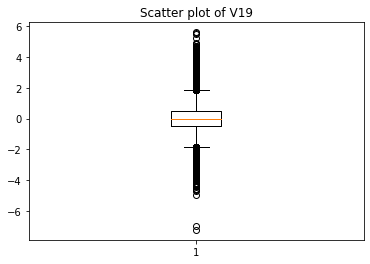

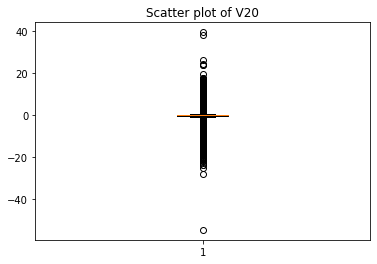

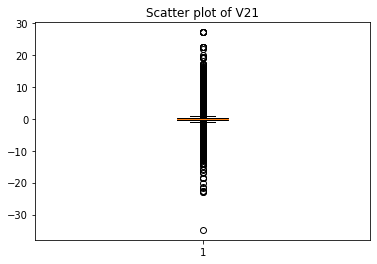

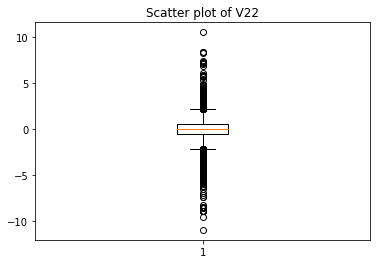

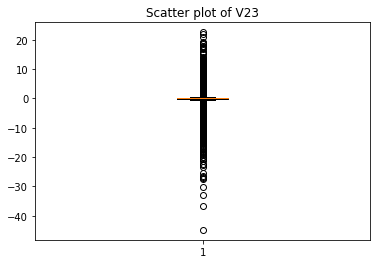

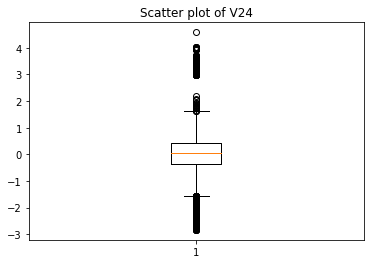

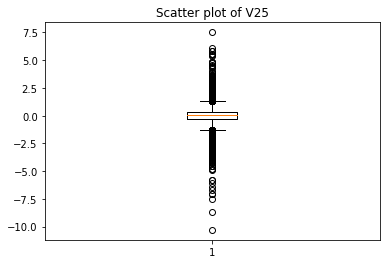

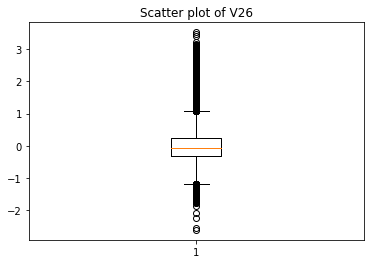

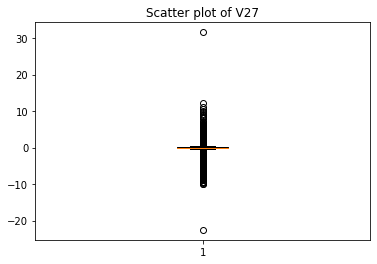

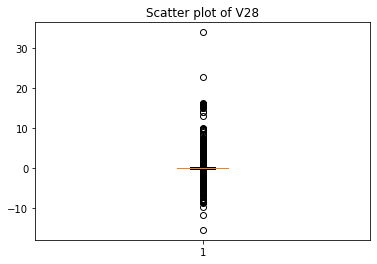

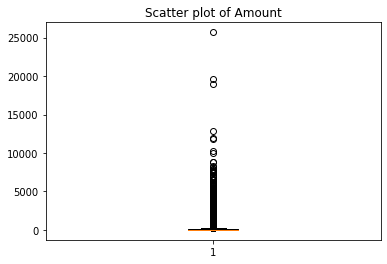

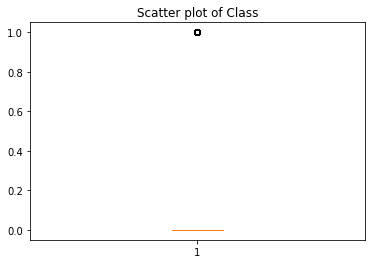

In [12]:
# 1. outlier treatment
for x in (df.columns):
    plt.title('Scatter plot of '+ x )
    plt.boxplot(df[x])
    plt.show()

In [13]:
# Importing library to split the data set into train and test
from sklearn.model_selection import train_test_split

In [14]:
df1 = df.copy()

In [15]:
# Every other feature except Performance Tag in X
X = df1.drop(['Class'], axis=1)
# Storing performance tag in y
y = df1['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100)

In [17]:
# Importing library for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var  =['Time','Amount']
# Scaling the train data
X_train[var] = scaler.fit_transform(X_train[var])

In [18]:
# Scaling the test data
X_test[var] = scaler.transform(X_test[var])

In [19]:
# Importing statsmodels for statistical summary
import statsmodels.api as sm

In [20]:
# Importing Logistic Regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
# Fitting the model - Model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199333
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -725.80
Date:                Mon, 06 Apr 2020   Deviance:                       1451.6
Time:                        21:30:20   Pearson chi2:                 5.75e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7432      0.174    -50.107      0.000      -9.085      -8.401
Time          -0.2893      0.131     -2.204      0.027      -0.547      -0.032
V1             0.2048      0.053      3.834      0.000       0.100       0.309
V2            -0.0747      0.067     -1.115      0.265      -0.206       0.057
V3            -0.0662      0.065     -1.014      0.311      -0.194       0.062
V4             0.6854      0.083      8.263      0.000       0.523       0.848
V5             0.0972      0.079      1.237      0.216      -0.057       0.251
V6            -0.1082      0.090     -1.201      0.230      -0.285       0.068
V7            -0.0986      0.082     -1.208      0.227      -0.259       0.061
V8            -0.2002      0.040     -4.957      0.000      -0.279      -0.121
V9            -0.4619      0.127     -3.638      0.000      -0.711      -0.213
V10           -0.8623      0.114     -7.551      0.000      -1.086      -0.638
V11           -0.1698      0.100     -1.689      0.091      -0.367       0.027
V12            0.0211      0.103      0.204      0.838      -0.181       0.223
V13           -0.3442      0.102     -3.385      0.001      -0.543      -0.145
V14           -0.6182      0.076     -8.103      0.000      -0.768      -0.469
V15           -0.2032      0.108     -1.890      0.059      -0.414       0.007
V16           -0.1570      0.139     -1.130      0.258      -0.429       0.115
V17           -0.1223      0.085     -1.447      0.148      -0.288       0.043
V18            0.0533      0.150      0.355      0.722      -0.241       0.347
V19            0.1266      0.118      1.076      0.282      -0.104       0.357
V20           -0.5751      0.108     -5.316      0.000      -0.787      -0.363
V21            0.3820      0.075      5.118      0.000       0.236       0.528
V22            0.5303      0.160      3.308      0.001       0.216       0.845
V23           -0.0574      0.072     -0.798      0.425      -0.198       0.084
V24            0.0919      0.182      0.506      0.613      -0.264       0.448
V25           -0.1094      0.166     -0.661      0.509      -0.434       0.215
V26           -0.0112      0.231     -0.049      0.961      -0.463       0.441
V27           -0.8578      0.167     -5.145      0.000      -1.185      -0.531
V28           -0.3664      0.116     -3.158      0.002      -0.594      -0.139
Amount         0.2309      0.118      1.960      0.050     2.6e-05       0.462
==============================================================================
"""

In [22]:
# Fitting the model - Model 2
logistic = LogisticRegression(class_weight = 'balanced')

logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Importing library
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [24]:
# Predict default for test data
y_pred = logistic.predict(X_test)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average = 'binary')
print("Sensitivity: \t", round(sensitivity,2),'\n','Specificity: \t',round(specificity,2), sep = '')

# check area under curve
y_pred_prob = logistic.predict_proba(X_test)[:,1]
print('AUC: \t',round(roc_auc_score(y_test, y_pred_prob),2))

[[83456  1845]
 [   16   126]]
Sensitivity: 	0.89
Specificity: 	0.98
AUC: 	 0.98


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.89      0.12       142

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



### Logistic Regression with SMOTE

In [26]:
#conda install -c conda-forge pandas_ml

In [27]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE, ADASYN

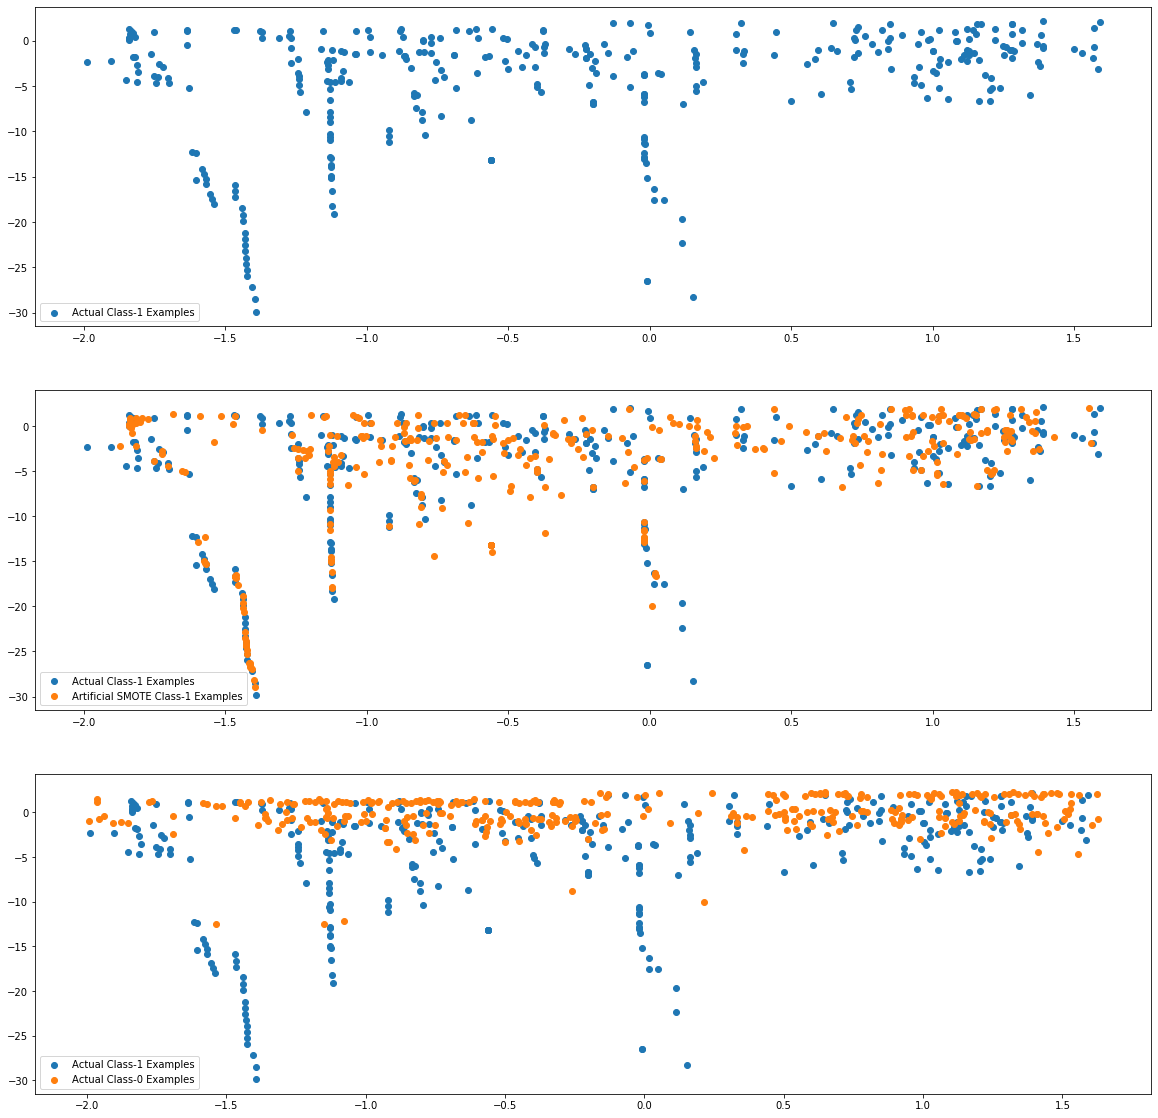

In [28]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [29]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [30]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_smote, y_train_smote)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9767681378228761


In [31]:
y_pred1 = np.array(logistic.predict(X_test))
y_test1 = np.array(y_test)
confusion_matrix1 = confusion_matrix(y_test1, y_pred1)
print("Confusion matrix:\n%s" % confusion_matrix1)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Confusion matrix:
[[83332  1969]
 [   16   126]]
Sensitivity: 	0.89
Specificity: 	0.98


### Logistic Regression with ADASYN

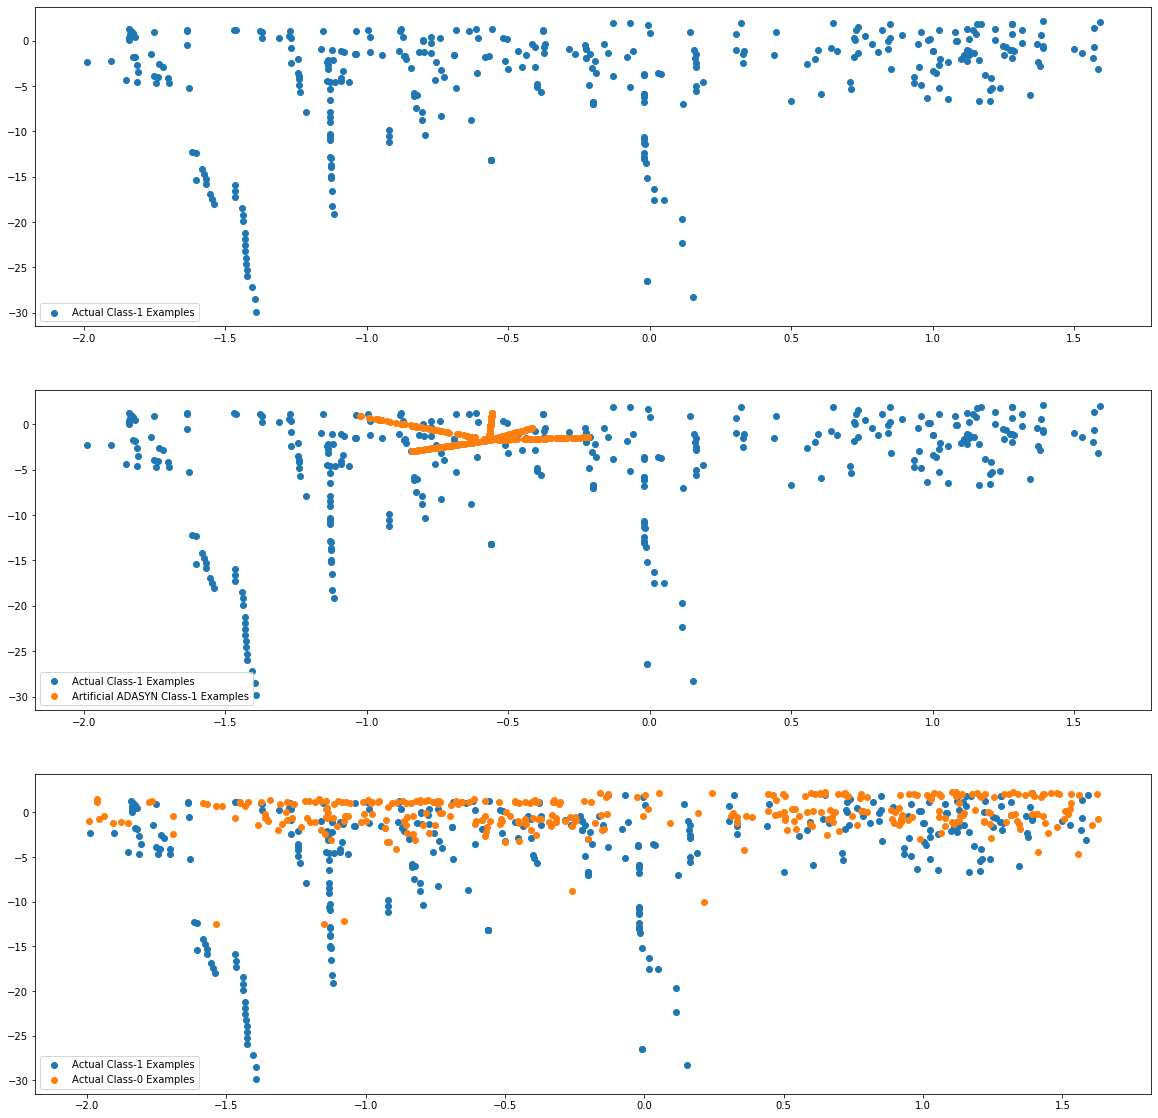

In [32]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [33]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_adasyn, y_train_adasyn)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9169153704809054


In [34]:
y_pred2 = np.array(logistic.predict(X_test))
y_test2 = np.array(y_test)
confusion_matrix2 = confusion_matrix(y_test2, y_pred2)
print("Confusion matrix:\n%s" % confusion_matrix2)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test2, y_pred2, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Confusion matrix:
[[78211  7090]
 [    9   133]]
Sensitivity: 	0.94
Specificity: 	0.92


### XGBOOST 

In [35]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

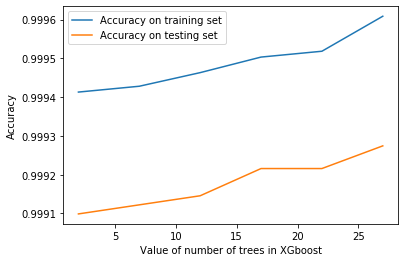

In [36]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [37]:
xgb=XGBClassifier(n_estimators=23)
xgb.fit(X_train,y_train)
print('Accuracy of XGB n=23 on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n=23 on the testing dataset is :0.999


In [38]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.80      0.71      0.75       142

    accuracy                           1.00     85443
   macro avg       0.90      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Random Forest on sample data
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.87      0.75      0.81       142

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [41]:
# Random Forest on "weighted" sample data
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4, class_weight={1:10,0:1})
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.89      0.76      0.82       142

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [42]:
# savings_correct_pred = fps[0]*cost_of_transaction
def fraud_prediction_stats(X_actual, y_actual, y_pred):
    
    X_actual = X_actual.reset_index(drop=True)
    y_actual = y_actual.reset_index(drop=True)
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    cost_per_transaction = 10
    savings = 0
    losses = 0
    total_savings = 0
    for i in range(len(y_pred)):
        tp_init = 0
        fp_init = 0
        tn_init = 0
        fn_init = 0
        if y_actual[i]==y_pred[i]==1:
            savings += X_actual.loc[i, "Amount"]
            tp_init = 1
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            fp_init = 1
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            tn_init = 0
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            losses += X_actual.loc[i, "Amount"]
            fn_init = 1
            FN += 1
        
        total_savings += (tp_init*X_actual.loc[i, "Amount"]) - ( (tp_init*10 + fp_init*10) + (fn_init*X_actual.loc[i, "Amount"]) )
        
    return (TP+FP, savings, losses, total_savings)
    # ( total_fraud, savings_by_correct_prediction, losses_by_wrong_prediction, total_savings )

In [43]:
total_fraud, savings_by_correct_prediction, losses_by_wrong_prediction, total_savings = fraud_prediction_stats(X_test, y_test, y_pred)

In [44]:
print("total_savings: \t", total_savings)
print("total_fraud: \t", total_fraud)
print("savings_by_correct_prediction: \t", savings_by_correct_prediction)
print("losses_by_wrong_prediction: \t", losses_by_wrong_prediction)

total_savings: 	 -1204.7249334957253
total_fraud: 	 121
savings_by_correct_prediction: 	 9.373150253018757
losses_by_wrong_prediction: 	 4.098083748744807
